In [1]:
!pip install imagehash

     |████████████████████████████████| 296kB 18.7MB/s 


In [2]:
!pip install django

     |████████████████████████████████| 7.9MB 19.3MB/s 


In [3]:
!pip install tensorflow-data-validation

     |████████████████████████████████| 1.4MB 19.7MB/s 
     |████████████████████████████████| 17.7MB 188kB/s 
     |████████████████████████████████| 296kB 50.2MB/s 
     |████████████████████████████████| 2.3MB 50.5MB/s 
     |████████████████████████████████| 9.0MB 47.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 153kB 55.8MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 829kB 53.5MB/s 
     |████████████████████████████████| 2.2MB 44.4MB/s 
     |████████████████████████████████| 174kB 62.2MB/s 
     |████████████████████████████████| 440kB 60.8MB/s 
     |████████████████████████████████| 276kB 61.0MB/s 
     |████████████████████████████████| 153kB 54.9MB/s 
     |████████████████████████████████| 184kB 59.6MB/s 
     |████████████████████████████████| 174kB 52.9MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 71kB 10.6MB/s

In [1]:
# 런타임 다시 시작 후
# tensorflow-data-validation 확인
import sys, os
import tempfile, urllib, zipfile
import tensorflow_data_validation as tfdv
print('TFDV version: {}'.format(tfdv.version.__version__))

TFDV version: 0.29.0


In [2]:
# # 데이터 준비
# BASE_DIR = './shopee-product-matching/'
# DATA_DIR = os.path.join(BASE_DIR, 'data')
# # OUTPUT_DIR = os.path.join(BASE_DIR, 'shopee_output')
# TRAIN_DATA = os.path.join(DATA_DIR, 'train', 'data.csv')
# EVAL_DATA = os.path.join(DATA_DIR, 'eval', 'data.csv')
# # SERVING_DATA = os.path.join(DATA_DIR, 'serving', 'data.csv')

# ## Statics 생성 및 시각화
# # csv, dataframe, tfrecord 를 통해 Statics 생성
# [methods for methods in dir(tfdv) if "generate" in methods]
# # 'generate_statistics_from_csv','generate_statistics_from_dataframe','generate_statistics_from_tfrecord']

# # Statisitcs 생성
# train_stats = tfdv.generate_statistics_from_csv(data_location=TRAIN_DATA)
# # tfdv.generate_statistics_from_csv(data_location, column_names=None)

# # 시각화
# tfdv.visualize_statistics(train_stats)
# #tfdv.visualize_statistics(lhs_statistics, rhs_statistics=None,
# #                         lhs_name='lhs_statistics', rhs_name='rhs_statistics')

ValueError: ignored

In [3]:
## 라이브러리

# 파일 처리
import os
# Data 처리
import pandas as pd
import numpy as np

# Text Color
from termcolor import colored
# 이미지 및 그래프 출력
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
# 경고메시지 지우기
import warnings
warnings.filterwarnings(action='ignore')
# warnings.simplefilter("ignore")

# 해쉬(phash) 값 처리
import imagehash
# 상태바 상태
import tqdm
from tqdm.auto import tqdm as tqdmp
tqdmp.pandas()

# 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# 
import csv
import django
import sys

#
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

#
import skimage.io as io
from PIL import Image



In [4]:
## Work directory
WORK_DIR = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching'
os.listdir(WORK_DIR)


['train_images',
 'test_images',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [5]:
## 데이터 요약
train = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/test.csv')
ss = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/sample_submission.csv', index_col = 0)

print('-'*40, 'Train head', '-'*40)
print(train.head())
print('-'*40, 'Test head', '-'*40)
print(test.head())
print('-'*30, 'Sample submission head', '-'*30)
print(ss.head())


---------------------------------------- Train head ----------------------------------------
         posting_id  ... label_group
0   train_129225211  ...   249114794
1  train_3386243561  ...  2937985045
2  train_2288590299  ...  2395904891
3  train_2406599165  ...  4093212188
4  train_3369186413  ...  3648931069

[5 rows x 5 columns]
---------------------------------------- Test head ----------------------------------------
        posting_id  ...                                              title
0  test_2255846744  ...  Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1  test_3588702337  ...  (Beli 1 Free Spatula) Masker Komedo | Blackhea...
2  test_4015706929  ...   READY Lemonilo Mie instant sehat kuah dan goreng

[3 rows x 4 columns]
------------------------------ Sample submission head ------------------------------
                         matches
posting_id                      
test_2255846744  test_2255846744
test_3588702337  test_3588702337
test_4015706929  test_4015706929

In [7]:
print('Train images: %d' %len(os.listdir(os.path.join(WORK_DIR, "train_images"))))
print('Test images: %d' %len(os.listdir(os.path.join(WORK_DIR, "test_images"))))

Train images: 32432
Test images: 3


In [9]:
print('TF',tf.__version__)

TF 2.4.1


In [8]:
train = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/Shopee_data/train.csv')
print('train shape =', train.shape)
train.head()

train shape = (34250, 5)


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [13]:
# Display Random Items from Train Data
# 랜덤으로 데이터 출력

base_dir = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train_images'

def displayIMG(df=None, random=False, rows=4, columns=6, path=base_dir):
    for r in range(rows):
        plt.figure(figsize=(20,5))
        for c in range(columns):

            if random : 
                row = np.random.randint(0, len(df))
            else: 
                row = columns*r + c
                
            name = df.iloc[row, 1]
            title =train.iloc[row,3]
            
            title_with_return = ""
            for idx,word in enumerate(title):
                title_with_return += word
                if (idx!=0)&(idx%20==0): title_with_return += '\n'
                    
            image = cv2.imread(path + name)
            plt.subplot(1,columns, c+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(image)
        plt.show()
        
# displayIMG(df=train, random=True)

In [11]:
# Train Image
train_images = WORK_DIR + "/train_images/" + train['image']
train['path'] = train_images

test_images = WORK_DIR + "/test_images/" + test['image']
test['path'] = test_images

train.head()

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,/content/drive/MyDrive/Machine Learning Colab/...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,/content/drive/MyDrive/Machine Learning Colab/...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,/content/drive/MyDrive/Machine Learning Colab/...
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,/content/drive/MyDrive/Machine Learning Colab/...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,/content/drive/MyDrive/Machine Learning Colab/...


In [14]:
print('label_group unique values: {}'.format(train['label_group'].nunique()))

label_group unique values: 11014


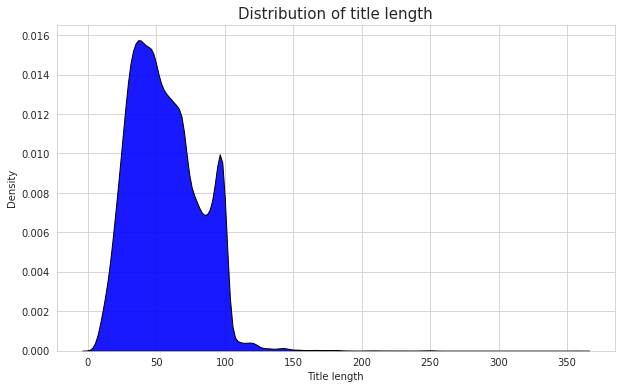

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train['title'].apply(lambda x: len(x)), fill = True,
            color = 'b',
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show()


In [16]:
## image shapes distribution
## 이미지 모양 출력

# Shape columns
train['img_shape'] = train['path'].progress_apply(lambda x: np.shape(io.imread(x)))j99

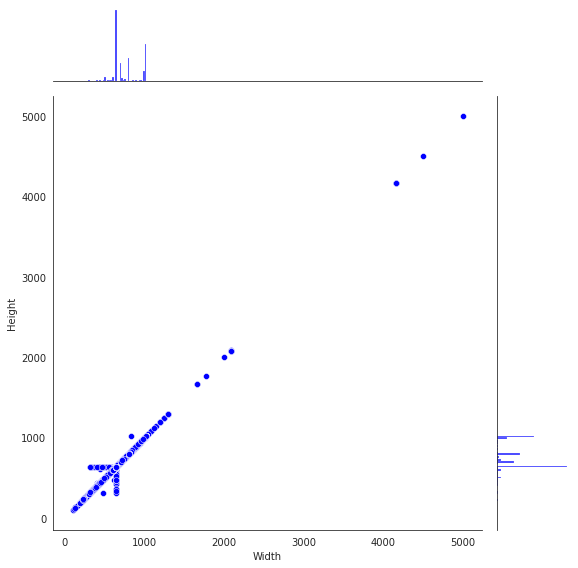

In [21]:
shapes = pd.DataFrame().from_records(train['img_shape'])
shapes.columns = ['Width', 'Height', 'Colors']

sns.set_style("white")
sns.jointplot(x = shapes.iloc[:, 0].astype('float32'),
              y = shapes.iloc[:, 1].astype('float32'),
              height = 8, color = 'b')
plt.show()

In [38]:
## Work with image PHASH

imagehash.hex_to_hash(train['image_phash'][0])


array([[ True, False, False,  True, False,  True, False, False],
       [ True, False, False,  True, False,  True,  True,  True],
       [False,  True, False, False,  True,  True,  True,  True],
       [ True, False, False,  True, False, False,  True,  True],
       [False,  True,  True,  True,  True,  True, False,  True],
       [False,  True, False, False,  True,  True, False, False],
       [False, False,  True, False, False,  True, False, False],
       [False, False,  True,  True, False, False,  True,  True]])

In [40]:
def match_matrix(phase_array):

# phash값으로 일치 확인
# input - phash . 
# Output - phash diff matrix (pandas data frame)

    phashs = phash_array.apply(lambda x: imagehash.hex_to_hash(x))
    phash_matrix = pd.DataFrame()
    pbar = tqdm.tqdm(total = len(phash_array), desc = 'Progress:',
                     position = 0, leave = True)
    for idx, i in enumerate(phash_array):
        pbar.update(1)
        phash_matrix = pd.concat([phash_matrix, phashs - imagehash.hex_to_hash(i)],
                                 axis = 1)
      pbar.close()
      phash_matrix.columns = range(len(phash_array))
      return phash_matrix


IndentationError: ignored

In [42]:
def match_matrix(phash_array):
    """
    A function that checks for matches by phash value.
    Takes phash values as input.
    Output - phash diff matrix (pandas data frame)
    """
    phashs = phash_array.apply(lambda x: imagehash.hex_to_hash(x))
    phash_matrix = pd.DataFrame()
    pbar = tqdm.tqdm(total = len(phash_array), desc = 'Progress:', 
                     position = 0, leave = True)
    for idx, i in enumerate(phash_array):
        pbar.update(1)
        phash_matrix = pd.concat([phash_matrix, phashs - imagehash.hex_to_hash(i)], 
                                 axis = 1)
    pbar.close()
    phash_matrix.columns = range(len(phash_array))
    return phash_matrix

In [43]:
train_part = train.iloc[:1000, :]
matches = match_matrix(train_part['image_phash'])
matches

Progress:: 100%|██████████| 1000/1000 [00:11<00:00, 90.14it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,42,40,30,32,34,32,30,38,36,38,34,34,26,32,32,40,30,42,34,30,34,34,38,34,30,32,36,38,38,36,34,32,32,36,28,22,32,34,30,...,38,32,38,26,36,36,34,38,30,26,30,30,32,34,36,30,28,30,26,34,26,32,26,34,42,30,36,34,34,32,26,28,34,32,26,28,42,34,26,26
1,42,0,28,28,34,32,36,24,28,32,28,32,32,38,32,30,30,32,20,30,28,30,34,30,34,34,34,26,20,20,30,30,26,36,24,34,38,34,30,32,...,26,32,24,34,22,36,28,28,28,26,32,32,32,36,30,30,32,24,36,34,32,24,46,28,32,38,26,30,34,34,32,28,30,28,42,32,30,32,32,34
2,40,28,0,34,44,26,34,32,28,32,20,32,32,30,34,26,28,32,24,36,30,28,36,22,30,24,34,34,32,32,36,28,28,32,26,38,30,36,34,30,...,30,34,22,40,30,28,34,32,26,40,32,30,30,32,28,28,26,34,34,30,24,28,30,24,32,30,24,30,32,36,34,42,30,30,32,36,24,32,30,24
3,30,28,34,0,34,40,30,32,34,30,36,36,36,36,34,34,32,32,28,32,26,30,28,32,30,34,32,28,30,30,36,36,28,26,36,36,36,30,30,32,...,38,28,28,32,28,40,34,34,30,30,40,28,32,36,36,38,30,32,34,32,32,28,32,34,30,38,32,32,32,28,28,34,38,32,38,28,38,28,30,30
4,32,34,44,34,0,32,30,30,36,30,38,34,34,32,32,36,34,28,36,30,32,32,32,36,34,34,34,32,38,38,30,36,38,32,36,38,38,28,26,32,...,30,30,44,30,34,28,24,28,30,32,32,30,36,34,34,30,38,30,30,34,40,40,28,36,26,32,36,34,34,26,36,22,28,32,26,24,36,34,32,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28,32,36,28,24,32,34,30,36,38,34,40,40,24,32,40,32,26,30,30,36,30,32,32,30,24,42,32,32,32,36,34,32,34,28,38,32,34,28,36,...,30,30,28,36,22,38,28,36,32,32,34,26,28,34,38,34,32,28,36,26,30,32,34,34,32,38,34,34,38,30,34,28,26,26,32,0,34,32,30,32
996,42,30,24,38,36,24,32,30,34,36,26,22,22,32,34,26,24,34,30,34,28,26,28,26,24,30,38,32,26,26,32,26,28,34,32,28,34,28,32,34,...,20,36,28,30,28,34,38,26,28,28,30,30,24,24,24,30,28,28,30,28,36,30,36,30,32,26,20,24,22,38,24,36,28,36,40,34,0,26,34,26
997,34,32,32,28,34,32,30,28,38,30,30,30,30,34,32,34,34,40,30,28,34,24,34,28,30,40,36,30,28,28,24,34,34,34,36,36,30,28,36,28,...,28,34,32,28,36,32,34,30,32,28,36,28,26,36,34,34,34,38,30,32,30,30,32,24,30,24,30,34,32,30,34,32,38,34,30,32,26,0,34,32
998,26,32,30,30,32,36,40,36,30,30,26,38,38,28,28,32,32,34,32,36,28,32,30,30,30,30,26,36,40,40,44,30,34,30,34,34,28,34,32,28,...,34,30,28,32,32,26,36,30,32,38,30,28,36,38,38,24,30,30,42,32,26,34,34,30,32,32,36,32,38,34,34,36,36,32,26,30,34,34,0,28


In [45]:
test_match = match_matrix(test['image_phash'][:3])
test_match

Progress:: 100%|██████████| 3/3 [00:00<00:00, 450.15it/s]


,0,1,2
0,0,36,26
1,36,0,32
2,26,32,0


In [46]:
match = []
for i in range(len(matches)):
    match.append(matches.iloc[i, :][(matches.iloc[i, :] == 0)].index.values)
match = pd.Series(match)

match[match.apply(lambda x: len(x) > 1)]

11            [11, 12]
12            [11, 12]
28            [28, 29]
29            [28, 29]
56            [56, 57]
            ...       
891    [889, 890, 891]
903         [903, 904]
904         [903, 904]
990         [132, 990]
997         [520, 997]
Length: 90, dtype: object

In [50]:
def image_viz(image_path):
    """
    Function for visualization.
    Takes path to image as input.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    plt.imshow(img)
    plt.axis('off')

In [51]:
train_part.loc[[11,12],['posting_id', 'image_phash', 'title', 'label_group']]


,posting_id,image_phash,title,label_group
11,train_2496690777,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932
12,train_2771755203,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932


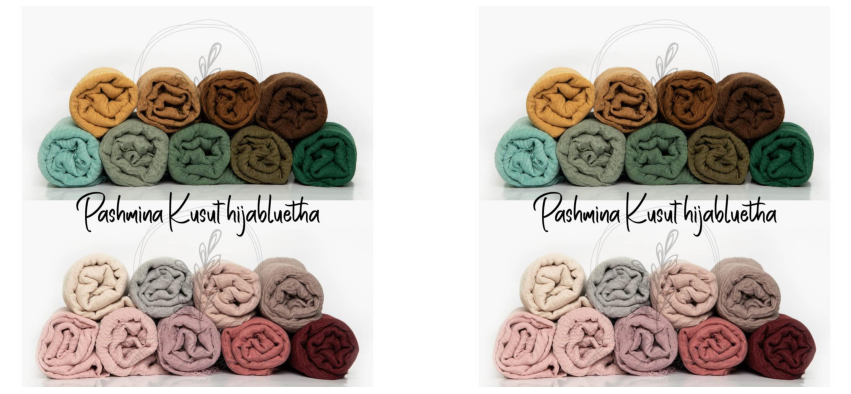

In [53]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[11, 'path'], 
                         train_part.loc[12, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

In [54]:
train_part.loc[[889,890,891], ['posting_id', 'image_phash', 'title', 'label_group']]

,posting_id,image_phash,title,label_group
889,train_1683455913,b6c8c835b1b66e0e,JUAL MUKENA ANAK /PUSAT GROSIR MUKENA ANAK DIS...,1662841908
890,train_38222465,b6c8c835b1b66e0e,MUKENA ANAK KATUN SUPER ADEM INCLUDE TAS RANS...,1662841908
891,train_3457647696,b6c8c835b1b66e0e,SALLE JUAL MUKENA ANAK KATUN DISNI TSUM ( TAS ...,1662841908


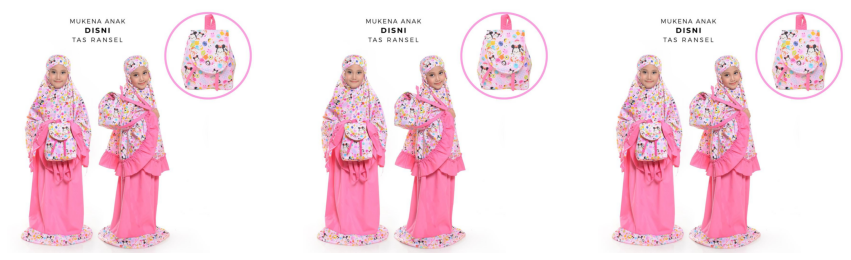

In [55]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[889, 'path'],
                         train_part.loc[890, 'path'],
                         train_part.loc[891, 'path']]):
    plt.subplot(1, 3, idx + 1)
    image_viz(i)

plt.show()

In [56]:
train_part.loc[[997,520],['posting_id', 'image_phash', 'title', 'label_group']]

,posting_id,image_phash,title,label_group
997,train_2711071734,89e1f542325be4e9,Termurah hijab instan anak diamond crepe,1119404634
520,train_1085922914,89e1f542325be4e9,Bergo anak 0-3 tahun / jilbab bayi premium,1119404634


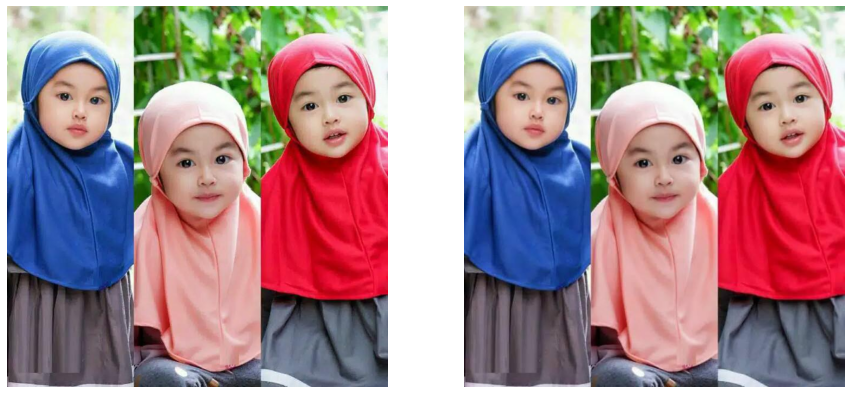

In [57]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[997, 'path'],
                         train_part.loc[520, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

In [60]:
match = []
for i in range(len(matches)):
    match.append(matches.iloc[i, :][(matches.iloc[i, :] > 0) & 
                                    (matches.iloc[i, :] <= 5)].index.values)
match = pd.Series(match)

match[match.apply(lambda x: len(x) >= 1)]

55     [312]
128    [515]
194    [469]
216    [567]
312     [55]
469    [194]
501    [789]
515    [128]
567    [216]
789    [501]
dtype: object

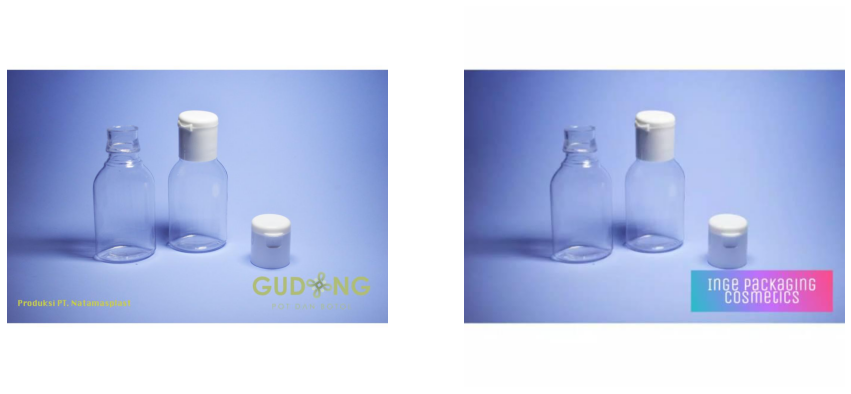

In [62]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[55, 'path'], 
                         train_part.loc[312, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

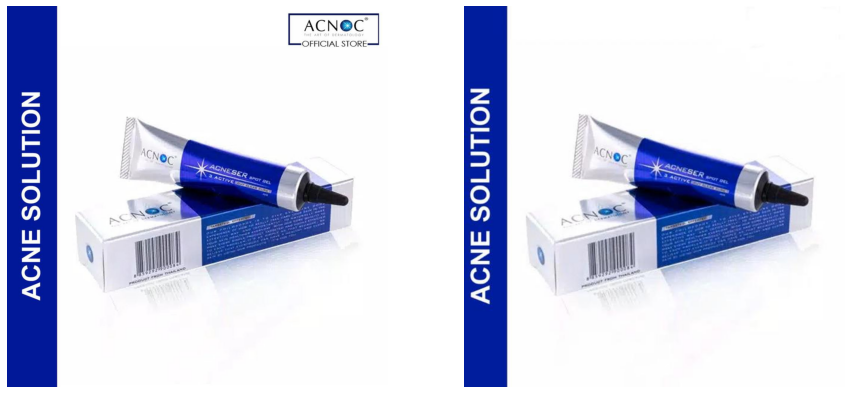

In [63]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[128, 'path'], 
                         train_part.loc[515, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

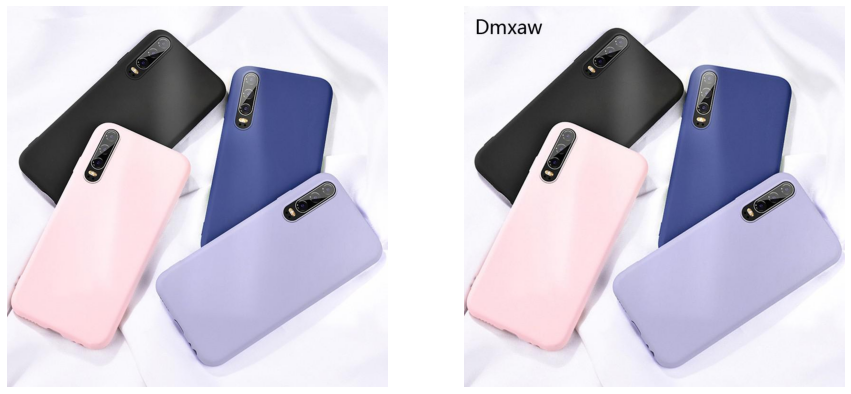

In [64]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([train_part.loc[216, 'path'], 
                         train_part.loc[567, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

In [65]:
### Baseline 예측

# Work functions
def phash_match(phash_array, element):
    """
    A function that calculates phash diffs.
    Takes phashs array and element as input.
    Output - phash diff
    """
    phash_diff = phash_array - phash_array[element]
    return phash_diff

def add_match(phash, i, dataset = train, threshold = 5):
    """
    A function that returns match names.
    Takes phash array, i element, dataset and threshold (default = 5).
    """
    diffs = phash_match(phash, i)
    matches = [x for x in diffs[diffs <= threshold].index.drop(i).values]
    str_matches = ''
    str_matches = str_matches + dataset.iloc[i, 0] + ' '
    for j in matches:
        str_matches = str_matches + dataset.iloc[j, 0] + ' '
    str_matches = str_matches[:-1]
    return str_matches


In [66]:
phashs = train['image_phash'][:1000].apply(lambda x: imagehash.hex_to_hash(x))
str_matches = []

for i in tqdm.tqdm(range(len(phashs)), desc = 'Progress:', position = 0, leave = True):
    str_matches.append(add_match(phashs, i))

str_matches[:15]

Progress:: 100%|██████████| 1000/1000 [00:04<00:00, 230.28it/s]


['train_129225211',
 'train_3386243561',
 'train_2288590299',
 'train_2406599165',
 'train_3369186413',
 'train_2464356923',
 'train_1802986387',
 'train_1806152124',
 'train_86570404',
 'train_831680791',
 'train_1598329973',
 'train_2496690777 train_2771755203',
 'train_2771755203 train_2496690777',
 'train_998568945',
 'train_4287573913']

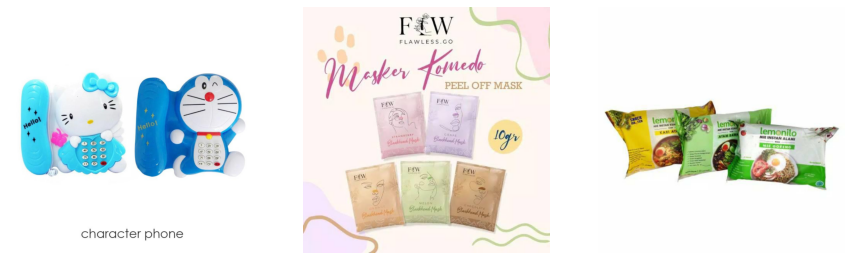

In [67]:
## Test Images ##

plt.figure(figsize = (15, 10))
for idx, i in enumerate(test['path']):
    plt.subplot(1, 3, idx + 1)
    image_viz(i)
plt.show()


In [68]:
test

,posting_id,image,image_phash,title,path
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...,/content/drive/MyDrive/Machine Learning Colab/...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...,/content/drive/MyDrive/Machine Learning Colab/...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng,/content/drive/MyDrive/Machine Learning Colab/...


In [69]:
test_phashs = test['image_phash'].apply(lambda x: imagehash.hex_to_hash(x))
test_matches = []

for i in tqdm.tqdm(range(len(test_phashs)), desc = 'Progress:',
                   position = 0, leave = True):
    test_matches.append(add_match(test_phashs, i, test, threshold = 7))

test_matches


Progress:: 100%|██████████| 3/3 [00:00<00:00, 382.51it/s]


['test_2255846744', 'test_3588702337', 'test_4015706929']

In [70]:
ss['matches'] = test_matches
ss.to_csv("submission.csv")
ss
## 이 방법으로는 쉽고 간단한지만 시간이 매우 오래 걸림 ##


,matches
posting_id,
test_2255846744,test_2255846744
test_3588702337,test_3588702337
test_4015706929,test_4015706929


In [72]:
def simple_match(dataset, element):
    """
    A function that returns match names.
    Takes dataset and i element.
    """
    matches = dataset[dataset['image_phash'] == 
                      dataset['image_phash'][element]]['posting_id'].drop(element).values
    str_matches = ''
    str_matches = str_matches + dataset.iloc[element, 0] + ' '
    for j in matches:
        str_matches = str_matches + j + ' '
    str_matches = str_matches[:-1]
    return str_matches

In [73]:
train_for_s = train[['posting_id', 'image_phash']]
str_matches = []

for i in tqdm.tqdm(range(len(train_for_s)), desc = 'Progress:',
                  position = 0, leave = True):
    str_matches.append(simple_match(train_for_s, i))

str_matches[:15]

Progress:: 100%|██████████| 34250/34250 [01:32<00:00, 369.31it/s]


['train_129225211',
 'train_3386243561',
 'train_2288590299',
 'train_2406599165',
 'train_3369186413',
 'train_2464356923 train_2753295474',
 'train_1802986387',
 'train_1806152124',
 'train_86570404',
 'train_831680791',
 'train_1598329973',
 'train_2496690777 train_2771755203',
 'train_2771755203 train_2496690777',
 'train_998568945',
 'train_4287573913 train_1748125201 train_1633622311']

In [74]:
test_for_s = test.loc[:2, ['posting_id', 'image_phash']]
test_matches = []

for i in tqdm.tqdm(range(len(test_for_s)), desc = 'Progress:', 
                   position = 0, leave = True):
    test_matches.append(simple_match(test_for_s, i))

test_matches

Progress:: 100%|██████████| 3/3 [00:00<00:00, 647.84it/s]


['test_2255846744', 'test_3588702337', 'test_4015706929']

In [ ]:
## ss['matches'] = test_matches
# ss


In [ ]:
# ss.to_csv("submission.csv")

In [76]:
# TF2.4_CNN
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/shopee/train'
validation_dir = './data/shopee/validation'

# ImageDataGenerator 생성

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)







In [75]:
# 학습이 종료됨. 모델 저장
model.save('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee_model')

NameError: ignored

In [ ]:
# # 경로 지정
# # 기본 경로
# base_dir = '/shopee_filtered'

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# train_baseline_dir = os.path.join(train_dir, 'baseline')
# print(train_baseline_dir)

# # 테스트에 사용되는 고양이/개 이미지 경로
# validation_baseline_dir = os.path.join(validation_dir, 'baseline')

# print(validation_baseline_dir)


/shopee_filtered/train/baseline
/shopee_filtered/validation/baseline


In [ ]:
# ## dataset 확인
# # 파일 이름과 개수
# train_baseline_fnames = os.listdir( train_baseline_dir )

# print(train_baseline_fnames[:5])

FileNotFoundError: ignored

In [ ]:
# # 이미지 확인

# %matplotlib inline

# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt

# nrows, ncols = 4, 4
# pic_index = 0

# fig = plt.gcf()
# fig.set_size_inches(ncols*3, nrows*3)

# pic_index+=8

# next_baseline_pix = [os.path.join(train_baseline_dir, fname)
#                 for fname in train_baseline_fnames[ pic_index-8:pic_index]]

# for i, img_path in enumerate(next_baseline_pix+next_dog_pix):
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off')

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

In [ ]:
# # model 구성

# import tensorflow as tf


# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])